In [1]:
%reset -f
import matplotlib.pyplot as plt
import os
import numpy as np
import parsing
import copy
import vertex
import time
import movement
import cell
import geometry
import data_holder
import math
import h5py
import simulate
import csv
import pandas as pd
import plotting
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

In [2]:
path = "output5.hdf5"

simulate.run_active_vertex_model(
    "vertices_big.csv",
    "cell_indices_big.csv",
    path,
    KA=1,
    KP=1,
    dt=0.001,
    D=1,
    v0=1.5,
    max_time=0.5,
    p0=3.85
)


0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.055000

In [ ]:
# path = "output_no_motion.hdf5"
# plt.rcParams['animation.embed_limit'] = 80
# anim = plotting.plot_data(path, stepsize=)
# anim.save("figures/vertex_no_motion.mp4", writer="ffmpeg")

In [ ]:
# path = "output4.hdf5"
plt.rcParams["animation.embed_limit"] = 80
anim = plotting.plot_data(path, stepsize=20)
from IPython.display import HTML
HTML(anim.to_jshtml())

In [ ]:
import plotting

path = "output4.hdf5"

try:
    with h5py.File(path, "r") as f:
        lx = f["step_00000/vertices"].attrs["lx"]
        ly = f["step_00000/vertices"].attrs["ly"]
except FileNotFoundError:
    print("No File Found")

fig, ax = plt.subplots(figsize=(6, 6))

# Set limits for x and y axis
ax.set_xlim(0.1, lx)
ax.set_ylim(0.1, ly)
ax.set_xticks([])
ax.set_yticks([])

scat = ax.scatter([], [], c="red")

with h5py.File(path, "r") as f:
    dset = f["step_00000/edges"]
    j = f["step_00000/vertices"]
    lx = f["step_00000/vertices"].attrs["lx"]
    ly = f["step_00000/vertices"].attrs["ly"]
    plotting.graph_frame(ax, j, dset, lx, ly)

plt.savefig("figures/simple_verts_connected")

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open an image file
image = Image.open("figures/cells.jpg")

# Plot the image
plt.imshow(image)
plt.scatter(0.5, 0.5, s=60, c="r", alpha=0.5)
plt.axis("off")  # Hide the axis
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open an image file
image = Image.open("figures/cells.jpg")

# Convert image to a numpy array (if needed)
image_np = np.array(image)

# Plot the image
plt.imshow(image_np)

# Scatter plot on top of the image
# Ensure that coordinates are in the range of image dimensions
x = [
    image.width * 0.87,
    image.width * 0.85,
    image.width * 0.76,
    image.width * 0.73,
    image.width * 0.73,
    image.width * 0.81,
]
y = [
    image.height * 0.58,
    image.height * 0.53,
    image.height * 0.49,
    image.width * 0.35,
    image.width * 0.39,
    image.width * 0.42,
]
plt.scatter(x, y, s=60, c="r", alpha=1)  # Example point in the center

# Hide the axis
plt.axis("off")

# Show the plot
plt.savefig("figures/pic_with_points")
plt.show

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Parameters for the first ellipse (more circular)
ellipse1_width = 3
ellipse1_height = 2
ellipse1_area = np.pi * (ellipse1_width / 2) * (ellipse1_height / 2)
circle_radius = np.sqrt(ellipse1_area / np.pi)

# Parameters for the second ellipse
ellipse2_width = 5
ellipse2_height = 1
ellipse2_area = np.pi * (ellipse2_width / 2) * (ellipse2_height / 2)

# Calculate radius for a circle with the same area as the second ellipse
circle2_radius = np.sqrt(ellipse2_area / np.pi)

# Create the ellipses and circle
ellipse1 = Ellipse(
    (0.25, 0),
    width=ellipse1_width,
    height=ellipse1_height,
    angle=90,
    edgecolor="black",
    facecolor="none",
)
ellipse2 = Ellipse(
    (-2, 0),
    width=ellipse2_width,
    height=ellipse2_height,
    angle=90,
    edgecolor="black",
    facecolor="none",
)
circle = Circle((3, 0), radius=circle_radius, edgecolor="black", facecolor="none")
# Add shapes to the plot
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(circle)

# Set the limits of the plot
ax.set_xlim(-8, 10)
ax.set_ylim(-4, 4)

# Set equal scaling
ax.set_aspect("equal")

# Add grid and labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Ellipses and Circle with Same Area")

# Show the plot
plt.show()

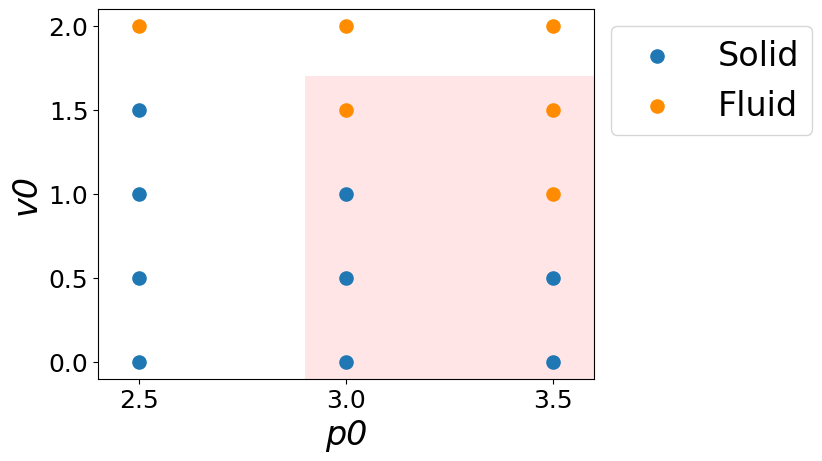

In [3]:
from matplotlib import patches

fig, ax = plt.subplots(1, 1)
x = [2.5, 2.5, 2.5, 2.5, 3, 3, 3, 3.5, 3.5]
y = [0, 0.5, 1, 1.5, 0, 0.5, 1, 0, 0.5]
x_fluid = [2.5, 3, 3, 3.5, 3.5, 3.5]
y_fluid = [2, 2, 1.5, 2, 1.5, 1]
ax.yaxis.set_ticks([0, 0.5, 1, 1.5, 2])
ax.xaxis.set_ticks([2.5, 3.0, 3.5])
ax.scatter(x, y, s=90, label="Solid")
ax.scatter(x_fluid, y_fluid, color="darkorange", s=90, label="Fluid")
# Add legend with italic text and larger font size
ax.legend(fontsize=24, loc="upper left", bbox_to_anchor=(1.0, 1.0), frameon=True)
ax.set_xlabel("p0", fontsize=24, fontstyle="italic")
ax.set_ylabel("v0", fontsize=24, fontstyle="italic")
ax.tick_params(labelsize=18)
box = patches.Rectangle(
    (2.9, -0.6),
    0.7,
    2.3,
    linewidth=2,
    edgecolor="None",
    facecolor="red",
    alpha=0.1,
    zorder=0,
)

# Add the box to the plot
ax.add_patch(box)
ax.set_xlim([2.4, 3.6])
ax.set_ylim([-0.1, 2.1])
plt.savefig("figures/simulated_data")